In [3]:
pip install opendatasets

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import opendatasets as od

In [5]:
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: madhushikaattanayaka
Your Kaggle Key: ··········


100%|██████████| 7.63k/7.63k [00:00<00:00, 4.68MB/s]

In [6]:
data=pd.read_csv("/content/random-linear-regression/test.csv")

In [7]:
data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [8]:
data.shape

(300, 2)

In [9]:
x=data['x']
y=data['y']

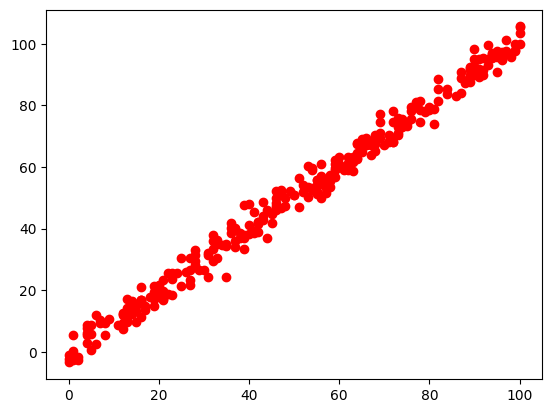

In [ ]:
plt.scatter(x,y, c='r')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape

((240,), (60,))

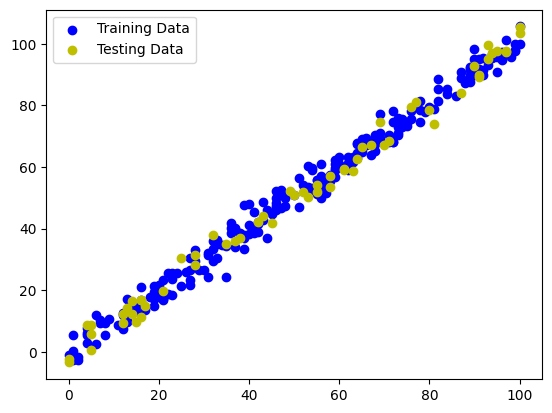

In [ ]:
plt.scatter(x_train,y_train,c='b' , label='Training Data')
plt.scatter(x_test,y_test,c='y' , label='Testing Data')
plt.legend()
plt.show()

# **Model** **Building**

In [11]:
#create a model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

#compile model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=['mae'])
#train model
epoch_number=4
model.fit(tf.expand_dims(x_train, axis=1),y_train,epochs=epoch_number)



Epoch 1/4
8/8 [==============================] - 1s 4ms/step - loss: 39.8660 - mae: 39.8660
Epoch 2/4
8/8 [==============================] - 0s 3ms/step - loss: 23.9568 - mae: 23.9568
Epoch 3/4
8/8 [==============================] - 0s 3ms/step - loss: 25.3712 - mae: 25.3712
Epoch 4/4
8/8 [==============================] - 0s 3ms/step - loss: 25.0916 - mae: 25.0916


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
y_predictions=model.predict(x_test)
y_predictions[:5]

2/2 [==============================] - 0s 8ms/step


array([[31.801872 ],
       [26.863552 ],
       [33.21282  ],
       [ 1.8192203],
       [32.15461  ]], dtype=float32)

In [17]:
y_test[:5]

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

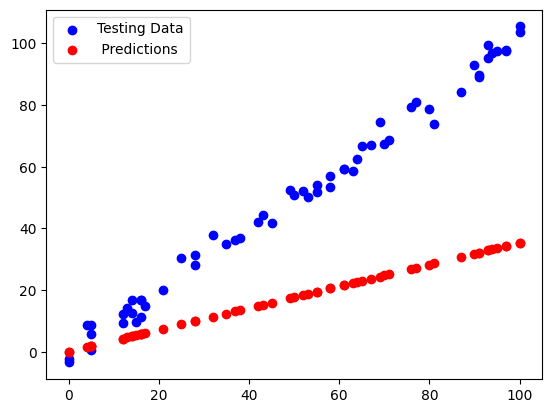

In [19]:
#plt.scatter(x_train,y_train,c='b' , label='Training Data')
plt.scatter(x_test,y_test,c='b' , label='Testing Data')
plt.scatter(x_test,y_predictions,c='r' , label=' Predictions')
plt.legend()
plt.show()

In [20]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 32.5814 - mae: 32.5814


[32.58141326904297, 32.58141326904297]

In [22]:
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_predictions))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=32.581413>

In [23]:
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_predictions))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1484.8684>

In [38]:
#create a model
model2= tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

#compile model
model2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.05),
              metrics=['mae'])
#train model
epoch_number=10
model2.fit(tf.expand_dims(x_train, axis=1),y_train,epochs=epoch_number)



Epoch 1/10
8/8 [==============================] - 1s 4ms/step - loss: 69.4621 - mae: 69.4621
Epoch 2/10
8/8 [==============================] - 0s 3ms/step - loss: 49.2647 - mae: 49.2647
Epoch 3/10
8/8 [==============================] - 0s 3ms/step - loss: 29.6393 - mae: 29.6393
Epoch 4/10
8/8 [==============================] - 0s 3ms/step - loss: 10.1574 - mae: 10.1574
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 6.7247 - mae: 6.7247
Epoch 6/10
8/8 [==============================] - 0s 3ms/step - loss: 4.5832 - mae: 4.5832
Epoch 7/10
8/8 [==============================] - 0s 3ms/step - loss: 4.0117 - mae: 4.0117
Epoch 8/10
8/8 [==============================] - 0s 3ms/step - loss: 2.6617 - mae: 2.6617
Epoch 9/10
8/8 [==============================] - 0s 3ms/step - loss: 2.5475 - mae: 2.5475
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 2.4443 - mae: 2.4443


In [39]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 64)                128       
                                                                 
 dense_15 (Dense)            (None, 10)                650       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 789 (3.08 KB)
Trainable params: 789 (3.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
y_predictions2=model2.predict(x_test)
y_predictions2[:5]

2/2 [==============================] - 0s 4ms/step


array([[91.65859 ],
       [77.4778  ],
       [95.710236],
       [ 5.560953],
       [92.6715  ]], dtype=float32)

In [41]:
y_test.head(5)

203    92.887723
266    79.503415
152    97.001484
9       8.746748
233    89.739520
Name: y, dtype: float64

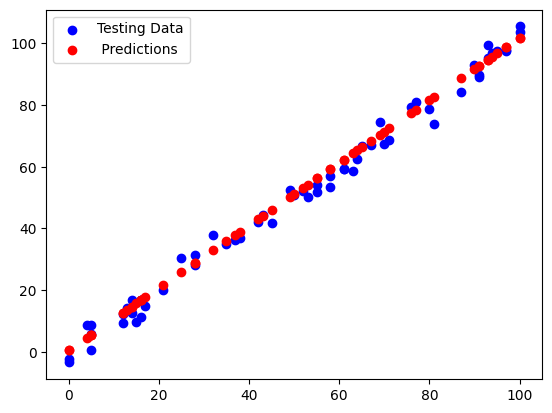

In [42]:
#plt.scatter(x_train,y_train,c='b' , label='Training Data')
plt.scatter(x_test,y_test,c='b' , label='Testing Data')
plt.scatter(x_test,y_predictions2,c='r' , label=' Predictions')
plt.legend()
plt.show()

In [43]:
model2.evaluate(x_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 2.6761 - mae: 2.6761


[2.67608642578125, 2.67608642578125]

In [44]:
mae = tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_predictions2))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.6760864>

In [45]:
mse = tf.metrics.mean_squared_error(y_test,tf.squeeze(y_predictions2))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=10.424603>